# Utils.Display

> Fill in a module description here


In [ ]:
#| default_exp utils.test_display

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:

from nbdev.showdoc import *
from nbdev.showdoc import *
from fastcore.test import *
import inspect

In [ ]:

def _fig_bounds(x):
    r = x//32
    return min(5, max(1,r))

In [ ]:
from fastcore.utils import *
import cv2
import numpy as np
from imutils import resize
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import moviepy.editor as mvp
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter
import logging
import mavcom.params as params
from mavcom.utils.display import *

In [ ]:
show_doc(show_image)

---

### show_image

>      show_image (im, ax=None, figsize=None, title=None, text=None,
>                  fontsize=12, ctx=None, rgb2bgr:bool=False, **kwargs)

Show a PIL or PyTorch image on `ax`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| im |  |  |  |
| ax | NoneType | None | if None, a new figure is created |
| figsize | NoneType | None | if None, the figure size is set to min of 5 and max of 1/32 of the image size |
| title | NoneType | None | title of the image |
| text | NoneType | None | text to be written on image |
| fontsize | int | 12 | fontsize of text |
| ctx | NoneType | None | context |
| rgb2bgr | bool | False | convert from/to RGB |
| kwargs |  |  |  |
| **Returns** | **Axes** |  | **return matplotlib axis** |

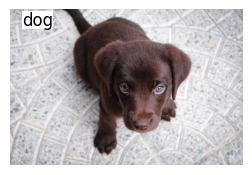

In [ ]:
im2 = np.array(Image.open(TEST_IMAGE))
ax = show_image(im2, text='dog', figsize=(3,3))

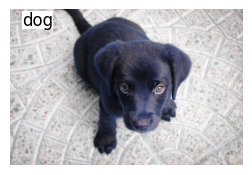

In [ ]:
ax = show_image(im2, text='dog', figsize=(3,3), rgb2bgr=True)

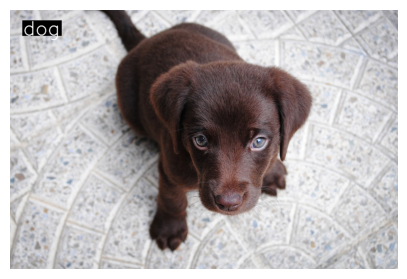

In [ ]:
im2 = np.array(Image.open(TEST_IMAGE))
im2 = puttext(im2, 'dog')
ax = show_image(im2)

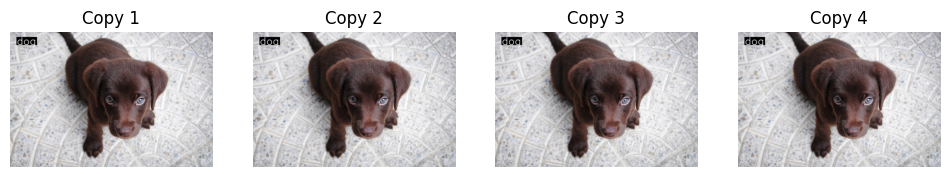

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): show_image(im2, ax=ax, title=f'Copy {i+1}')

In [ ]:
show_doc(ScrollingLog.update)

---

### ScrollingLog.update

>      ScrollingLog.update (message:str, index=None)

Add a message to the log, if index is specified, update the message at the index

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| message | str |  | add a message to the log |
| index | NoneType | None | index of the message to be updated |

In [ ]:
show_doc(ScrollingLog.draw)

---

### ScrollingLog.draw

>      ScrollingLog.draw (image, font=0)

Draw the log on the image

**Run some tests**

In [ ]:
image = np.array(Image.open(TEST_IMAGE))
log = ScrollingLog()
test_eq(log.draw(image), None)   # runs with no log present
for i in range(10):
    log.update(f"Message {i}")

test_eq(log.log[0], "Message 5")
test_eq(log.log[-1], "Message 9")
test_eq(len(log.log), 5)
log.draw(image)

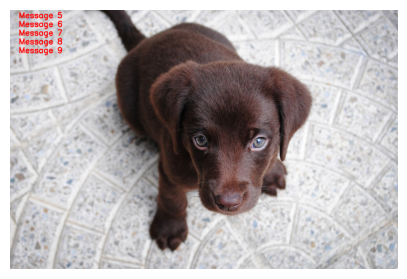

In [ ]:
ax = show_image(image)

In [ ]:
# from mavcom.utils.display import ScrollingLog, ScrollingLogHandler
show_doc(ScrollingLogHandler.set_filter)

---

### ScrollingLogHandler.set_filter

>      ScrollingLogHandler.set_filter (_filter:str)

Set the filter for the log message

INFO   | uav_log         | 03.735 | 817836736.py: 11 | MainThread         | AIR: This is an info log.
WARNIN | uav_log         | 03.737 | 817836736.py: 12 | MainThread         | This is a warning log.
ERROR  | uav_log         | 03.738 | 817836736.py: 13 | MainThread         | AIR: This is an error log.
ERROR  | uav_log         | 03.738 | 817836736.py: 14 | MainThread         | This is an error log.
WARNIN | uav_log         | 03.738 | 817836736.py: 15 | MainThread         | AIR:This is an warning log.


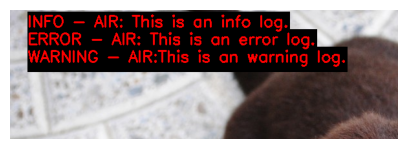

In [ ]:

# Standard Setting up logging
logging.basicConfig(format='%(asctime)-8s,%(msecs)-3d %(levelname)5s [%(filename)10s:%(lineno)3d] %(message)s',
                        datefmt='%H:%M:%S',
                        level=params.LOGGING_LEVEL)  # Todo add this to params
logger = logging.getLogger(params.LOGGING_NAME)

log = ScrollingLog(bg_color=(0,0,0))
handler_log = ScrollingLogHandler(log, logger, _filter='AIR')

# Example usage:
logger.info("AIR: This is an info log.")
logger.warning("This is a warning log.")
logger.error("AIR: This is an error log.")
logger.error("This is an error log.")
logger.warning("AIR:This is an warning log.")
# Display the logs using OpenCV or your desired method
# image = cv2.imread("path_to_image.jpg")
image = np.array(Image.open(TEST_IMAGE))
log.draw(image)
ax = show_image(image[:200,:600], figsize=(5,3))

test_eq(len(log.log), 3)   # there are 3 AIR messages in the log above


ERROR  | uav_log         | 03.887 | 2590345404.py:  2 | MainThread         | error1 .
ERROR  | uav_log         | 03.888 | 2590345404.py:  3 | MainThread         | error2 .


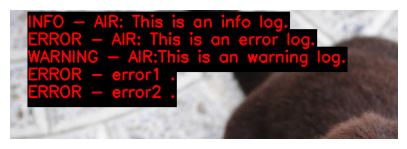

In [ ]:
handler_log.set_filter('')
logger.error("error1 .")
logger.error("error2 .")
image = np.array(Image.open(TEST_IMAGE))
log.draw(image)
ax = show_image(image[:200,:600], figsize=(5,3))
test_eq(len(log.log), 5)   

### Example of use  ScrollingLog with index

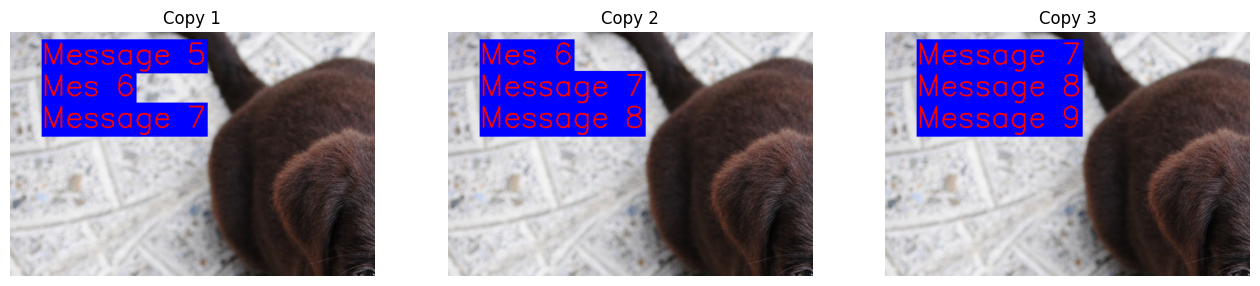

In [ ]:
# Simulate sequence of images

image = np.array(Image.open(TEST_IMAGE))
def test_log(image, max_lines=3, font_scale=2.0, index=None, bg_color=None):
    log = ScrollingLog(max_lines=max_lines, font_scale=font_scale, bg_color=bg_color)
    
    # Update log messages
    for i in range(6):
        log.update(f"Message {i}")
    log.update(f"Mes {i+1}")
    
    _,axs = plt.subplots(1,3,figsize=(16,8))
    for i,ax in enumerate(axs.flatten()): 
        img_copy = image.copy()
        log.update(f"Message {i + 7}", index=index)
        log.draw(img_copy)
        # just show the top left corner of the image
        img_copy = img_copy[:img_copy.shape[0]//2, :img_copy.shape[1]//2]
        show_image(img_copy, ax=ax, title=f'Copy {i+1}')

test_log(image, max_lines=3, font_scale=2.0, index=None, bg_color=(0,0,255))

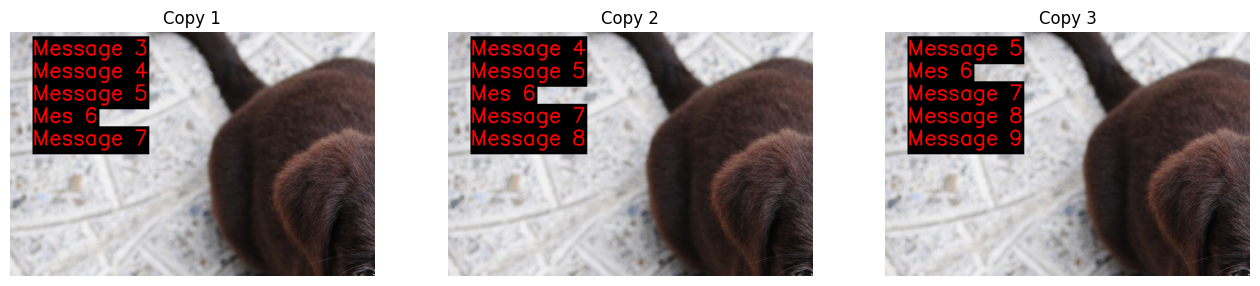

In [ ]:
test_log(image, max_lines=5, font_scale=1.4, index=None, bg_color=(0,0,0))

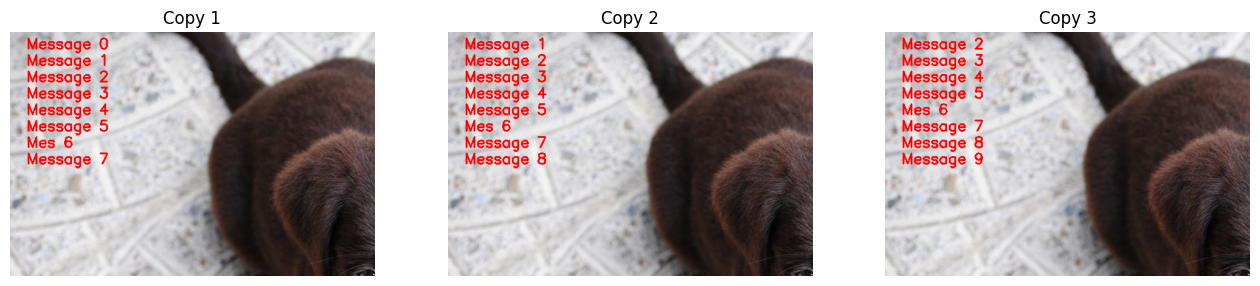

In [ ]:
test_log(image, max_lines=8, font_scale=1.0, index=None)

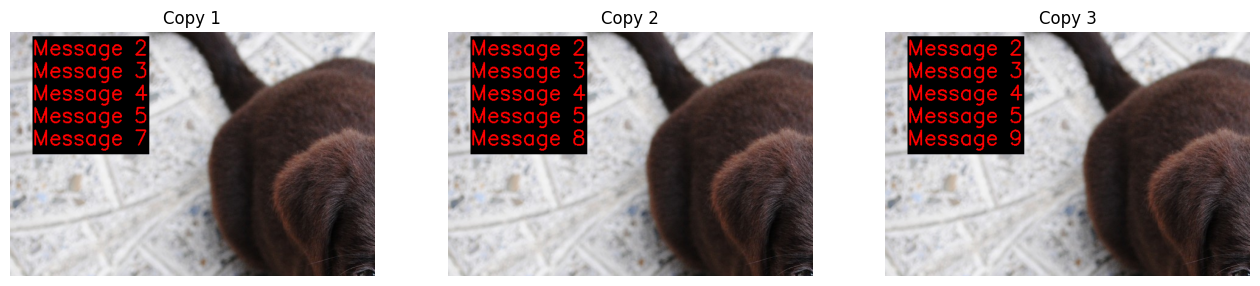

In [ ]:
test_log(image, max_lines=5, font_scale=1.4, index=6, bg_color=(0,0,0))



In [ ]:
from mavcom.utils.display import *

In [ ]:
show_doc(VideoWriter.add)

---

### VideoWriter.add

>      VideoWriter.add (img:numpy.ndarray)

Add an image to the video

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| img | ndarray | image to be added |
| **Returns** | **None** |  |

In [ ]:
show_doc(VideoWriter.close)

---

### VideoWriter.close

>      VideoWriter.close ()

In [ ]:
show_doc(VideoWriter.show)

---

### VideoWriter.show

>      VideoWriter.show (**kw)

Show the video

INFO   | uav_log         | 04.928 | 1743171834.py: 19 | MainThread         | Hello World
INFO   | uav_log         | 04.934 | 1743171834.py: 27 | MainThread         | Frame: 0
INFO   | uav_log         | 04.939 | 1743171834.py: 27 | MainThread         | Frame: 1
INFO   | uav_log         | 04.953 | 1743171834.py: 27 | MainThread         | Frame: 2
INFO   | uav_log         | 04.960 | 1743171834.py: 27 | MainThread         | Frame: 3
INFO   | uav_log         | 04.965 | 1743171834.py: 27 | MainThread         | Frame: 4
INFO   | uav_log         | 04.972 | 1743171834.py: 27 | MainThread         | Frame: 5
INFO   | uav_log         | 04.976 | 1743171834.py: 27 | MainThread         | Frame: 6
INFO   | uav_log         | 04.982 | 1743171834.py: 27 | MainThread         | Frame: 7
INFO   | uav_log         | 04.987 | 1743171834.py: 27 | MainThread         | Frame: 8
INFO   | uav_log         | 04.992 | 1743171834.py: 27 | MainThread         | Frame: 9
INFO   | uav_log         | 04.998 | 1743171834.py: 

Writing video to /home/jn/PycharmProjects/UAV/nbs/api/images/videowriter_test.mp4 at 5.0 fps.
Video: /home/jn/PycharmProjects/UAV/nbs/api/images/videowriter_test.mp4


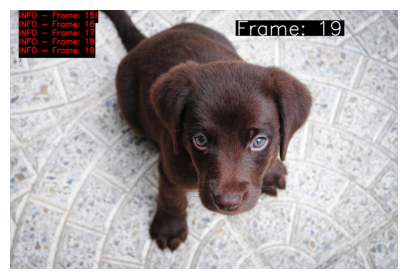

In [ ]:
#|eval: false
import cv2
from mavcom.utils.display import VideoWriter, ScrollingLog, ScrollingLogHandler, puttext, show_image
import numpy as np
from PIL import Image
from fastcore.test import *
import logging

# uncomment below to run logging on console
# logging.basicConfig(format=
#                     '%(asctime)-8s,%(msecs)-3d %(levelname)5s [%(filename)10s:%(lineno)3d] %(message)s',
#                     datefmt='%H:%M:%S',
#                     level=logging.INFO)  

logger = logging.getLogger(params.LOGGING_NAME) # Todo add this to params
logger.setLevel(params.LOGGING_LEVEL)
log = ScrollingLog(bg_color=(0,0,0))
handler_log = ScrollingLogHandler(log, logger)
logger.info(f"Hello World")

img = np.array(Image.open(TEST_IMAGE))
framecounter = 0
with VideoWriter("images/videowriter_test.mp4", 5.0) as video:
# if True:
    for i in range(20):
        puttext(img, f"Frame: {framecounter}", pos=(700,80))
        logger.info(f"Frame: {framecounter}")
        log.draw(img)
        # cv2.imshow('image', img)
        k = cv2.waitKey(100)
        if k == 27 or k == ord('q') or k == ord('Q'):
            break
        video.add(img)
        framecounter += 1
# cv2.destroyAllWindows()
ax=show_image(img)

video.show(width=500)
test_eq(framecounter, 20)

In [ ]:
show_doc(doc_class)

---

### doc_class

>      doc_class (cls)

Document all the public methods in a class

In [ ]:
# show_doc(Example)

In [ ]:
import asyncio
class Example:
    """This is an example class."""
    def __init__(self, param1:float, # param 1
                 param2:str): # param 2
        pass
    def _method_a(self, param1:int, # param 1
                 param2: int):  # param 2
        "This is method A"
        pass
    def method_a(self, param1:int, # the param 1
                 param2: int):  # the param 2
        "This is method A"
        pass
    async def method_b(self, param1:int, # the param 1
                 param2: int):  # the param 2
        "This is method B"
        pass
    

    

#### Example of use doc_class

In [ ]:
from mavcom.utils.display import doc_class
doc_class(Example)

---

### Example.method_a

>      Example.method_a (param1:int, param2:int)

This is method A

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| param1 | int | the param 1 |
| param2 | int | the param 2 |

---

### Example.method_b

>      Example.method_b (param1:int, param2:int)

This is method B

**Note: async function** 





In [ ]:
DocmentTbl(Example)

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| param1 | float | param 1 |
| param2 | str | param 2 |

In [ ]:
inspect.signature(Example.method_b)

<Signature (self, param1: int, param2: int)>

In [ ]:
signature_ex(Example.method_b)

<Signature (self, param1: int, param2: int)>

In [ ]:
obj = Example.method_b
params = L(signature_ex(obj, eval_str=True).parameters.keys())
params

(#3) ['self','param1','param2']

In [ ]:
DocmentTbl(Example.method_b)
DocmentTbl(Example.method_a)

In [ ]:
#| hide
# import nbdev; nbdev.nbdev_export()